# Exercises

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [13]:
# here is a Python list:

a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a
b = a[-3:]
print(b)
# reverse the list
b.reverse()
print(b)
# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])
c = [i ** 2 for i in a]
print(c)

[4, 5, 6]
[6, 5, 4]
[1, 4, 9, 16, 25, 36]


In [2]:
# create a numpy array from this list
import numpy as np

b = np.array(a) # change this

NameError: name 'a' is not defined

In [16]:
# find the mean of b
print(b.mean())

3.5


In [18]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
c = b ** 2
print(c)

[ 1  4  9 16 25 36]


In [24]:
# change b from a length-6 list to a 2x3 matrix
b = b.reshape(2,3)
print(b)

[[1 2 3]
 [4 5 6]]


In [27]:
# find the mean value of each row
print(b.mean(axis=1))

[2. 5.]


In [28]:
# find the mean value of each column
print(b.mean(axis=0))

[2.5 3.5 4.5]


In [30]:
# find the third column of b
print(b[:, 2])

[3 6]


In [3]:
# load in the "starbucks_clean.csv" dataset
import pandas as pd

df = pd.read_csv("../data/starbucks_clean.csv")
df.head()

,Unnamed: 0,beverage_category,beverage,beverage_prep,calories,total fat,trans fat,saturated fat,sodium,total carbohydrates,cholesterol,dietary fibre,sugars,protein,vitamin a,vitamin c,calcium,iron,caffeine
0,0,coffee,brewedcoffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0.0,0.0,0.0,0.0,175.0
1,1,coffee,brewedcoffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0.0,0.0,0.0,0.0,260.0
2,2,coffee,brewedcoffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,0.0,0.0,330.0
3,3,coffee,brewedcoffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,2.0,0.0,410.0
4,4,classicespressodrinks,caffèlatte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10.0,0.0,20.0,0.0,75.0


In [40]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
print(df['calories'].mean())

193.87190082644628


In [4]:
# how many different categories of beverages are there?
print(df["beverage_category"].nunique())

9


In [5]:
# what is the average # calories for each beverage category?
for cat in df["beverage_category"].unique():
    print(cat + ":", df.loc[df['beverage_category']  == cat]['calories'].mean())

coffee: 4.25
classicespressodrinks: 140.17241379310346
signatureespressodrinks: 250.0
tazoteadrinks: 177.30769230769232
shakenicedbeverages: 114.44444444444444
smoothies: 282.22222222222223
frappuccinoblendedcoffee: 276.94444444444446
frappuccinolightblendedcoffee: 162.5
frappuccinoblendedcrème: 233.07692307692307


In [54]:
# what beverage preparation includes the most sugar on average?
avg_sug_per_prep = {}
for prep in df["beverage_prep"].unique():
    avg_sug_per_prep[prep] = df.loc[df["beverage_prep"] == prep]["sugars"].mean()
max_prep = max(avg_sug_per_prep, key=avg_sug_per_prep.get)
print(max_prep + ":", avg_sug_per_prep[max_prep])

Whole Milk: 55.6875


In [6]:
# what is the average % daily value calcium content for each beverage?
for cat in df["beverage"].unique():
    print(cat + ":", df.loc[df['beverage']  == cat]['calcium'].mean())

brewedcoffee: 0.5
caffèlatte: 35.0
caffèmochawithoutwhippedcream: 30.0
vanillalatteorotherflavouredlatte: 32.916666666666664
caffèamericano: 1.5
cappuccino: 22.5
espresso: 0.0
skinnylatteanyflavour: 33.75
caramelmacchiato: 28.333333333333332
whitechocolatemochawithoutwhippedcream: 41.25
hotchocolatewithoutwhippedcream: 35.0
caramelapplespicewithoutwhippedcream: 0.0
tazotea: 0.0
tazochaitealatte: 21.666666666666668
tazogreentealatte: 39.166666666666664
tazofullleaftealatte: 20.833333333333332
tazofullleafredtealattevanillarooibos: 20.833333333333332
icedbrewedcoffeewithclassicsyrup: 0.0
icedbrewedcoffeewithmilkclassicsyrup: 8.0
shakenicedtazoteawithclassicsyrup: 0.0
shakenicedtazotealemonadewithclassicsyrup: 0.0
bananachocolatesmoothie: 20.0
orangemangobananasmoothie: 10.0
strawberrybananasmoothie: 10.0
coffee: 12.333333333333334
mochawithoutwhippedcream: 12.0
caramelwithoutwhippedcream: 12.0
javachipwithoutwhippedcream: 12.555555555555555
mocha: 11.0
caramel: 11.0
javachip: 11.66666666

In [23]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay
print(df.loc[(df["protein"] - df["calcium"]).idxmax()]["beverage"])

orangemangobananasmoothie


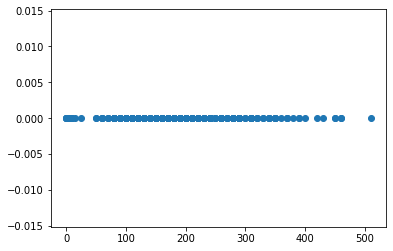

In [30]:
# plot the distribution of the number of calories in drinks using matplotlib
import matplotlib.pyplot as plt

plt.scatter(df["calories"], np.zeros_like(df['calories']))

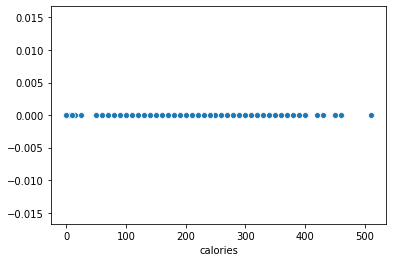

In [36]:
# plot the same distribution using seaborn. what about a density plot instead?
import seaborn as sb

sb.scatterplot(df["calories"], np.zeros_like(df['calories']))

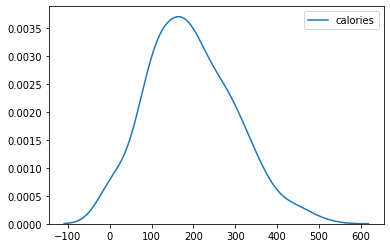

In [37]:
sb.kdeplot(df["calories"])

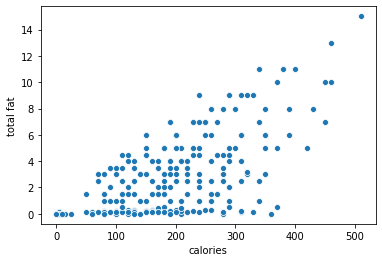

In [38]:
# plot calories against total fat using seaborn
sb.scatterplot(df["calories"], df["total fat"])

([], <a list of 0 Text yticklabel objects>)

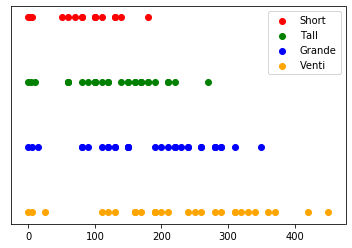

In [76]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.

# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.
sizes = ["Short", "Tall", "Grande", "Venti"]
colors = ["red", "green", "blue", "orange"]

for i in range(len(sizes)):
    dfSizeCals =  df[df["beverage_prep"].str.contains(sizes[i])]["calories"]
    plt.scatter(dfSizeCals, np.zeros_like(dfSizeCals) - i, color=colors[i], label=sizes[i])
plt.legend()
plt.yticks([])